In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import streamlit as st

In [233]:
import warnings
warnings.filterwarnings("ignore") 

In [6]:
# def read():
#     bat = pd.read_csv('cric_metric_bat.csv').iloc[:,1:]
#     bat = bat.replace('-',0)
#     bowl = pd.read_csv('cric_metric_bowl.csv').iloc[:,1:]
#     bowl = bowl.replace('-',0)

In [7]:
# bat.describe()

,Innings,Runs,Balls,Outs,HS,50,100,4s,6s
count,1430.0,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,1.0,24.911189,17.755245,0.740559,24.911189,0.142657,0.011888,2.014685,1.191608
std,0.0,23.866050,14.533529,0.440074,23.866050,0.349845,0.108421,2.354022,1.666678
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,6.000000,6.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,18.500000,14.000000,1.000000,18.500000,0.000000,0.000000,1.000000,1.000000
75%,1.0,37.750000,26.000000,1.000000,37.750000,0.000000,0.000000,3.000000,2.000000
max,1.0,130.000000,72.000000,2.000000,130.000000,1.000000,1.000000,15.000000,11.000000


In [8]:
# bat.head()

,Player,Match,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot
0,V Kohli,ipl2008_01,1,1,5,1,1.0,20.0,1,0,0,0,0,80.0
1,V Kohli,ipl2008_05,1,23,14,1,23.0,164.3,23,0,0,3,1,35.7
2,V Kohli,ipl2008_12,1,13,14,1,13.0,92.9,13,0,0,0,1,50.0
3,V Kohli,ipl2008_15,1,12,7,1,12.0,171.4,12,0,0,2,0,28.6
4,V Kohli,ipl2008_17,1,1,1,0,-,100.0,1,0,0,0,0,0.0


In [9]:
# bat.isna().sum()

Player     0
Match      0
Innings    0
Runs       0
Balls      0
Outs       0
Avg        0
SR         0
HS         0
50         0
100        0
4s         0
6s         0
Dot        0
dtype: int64

<Axes: >

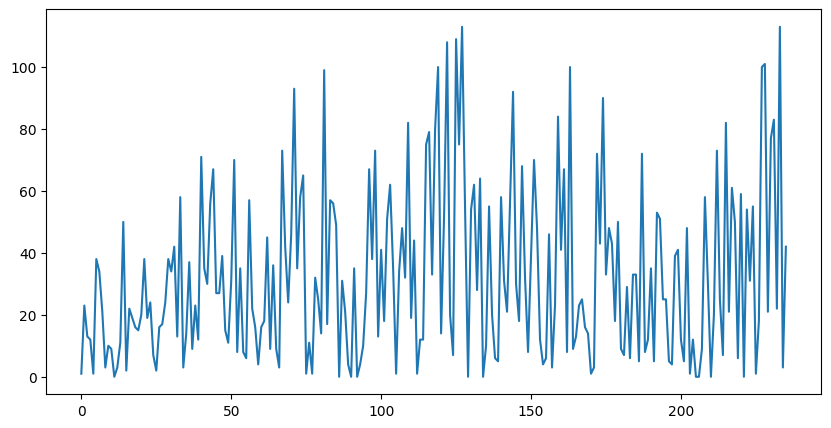

In [19]:
# plt.figure(figsize=(10,5))
# bat[bat['Player']=='V Kohli']['Runs'].plot()

In [13]:
# bat[bat['Player']=='V Kohli']['Runs'].describe()

count    236.000000
mean      32.305085
std       27.499480
min        0.000000
25%        9.750000
50%       25.000000
75%       50.000000
max      113.000000
Name: Runs, dtype: float64

In [20]:
# bat.head()

,Player,Match,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot
0,V Kohli,ipl2008_01,1,1,5,1,1.0,20.0,1,0,0,0,0,80.0
1,V Kohli,ipl2008_05,1,23,14,1,23.0,164.3,23,0,0,3,1,35.7
2,V Kohli,ipl2008_12,1,13,14,1,13.0,92.9,13,0,0,0,1,50.0
3,V Kohli,ipl2008_15,1,12,7,1,12.0,171.4,12,0,0,2,0,28.6
4,V Kohli,ipl2008_17,1,1,1,0,-,100.0,1,0,0,0,0,0.0


In [29]:
# bat = bat.replace('-',0)

In [32]:
# ridge_runs  = pd.DataFrame()

In [236]:
# players = list(bat['Player'].unique())

# Forecating using Auto Arima Model

In [10]:
def isstationary(x):
    if adfuller(x)[1]<0.05:
        return 1
    else:
        return 0

In [246]:
def stationary(x):
    if isstationary(x.diff().iloc[1:]):
        return np.abs(x.diff().iloc[1:])
    i=1
    while isstationary(x.diff(i).iloc[i+1:])==0:
        i+=1
    return np.abs(x.diff(i-1).iloc[i:])

In [255]:
def bat_forecast(bat,players): 
    Predictions_batting = {}
    for player in players:
            df = bat[bat['Player']==player]
            if len(df)>5:
                runs = df['Runs']
                balls = df['Balls']
                runs_pred = None
                balls_pred = None
                if len(runs)>6:
                    # if player=='RM Patidar':
                    #     st.write('YES')
                    if isstationary(runs)==0:
                        runs = stationary(runs)
                    model_runs = auto_arima(runs)
                    runs_pred = np.round(list(model_runs.predict(n_periods=1))[0])
                else:
                    print('Not much experience on Batiing')
                if len(balls)>6:
                    if isstationary(balls)==0:
                        runs = stationary(balls)
                    model_balls = auto_arima(balls)
                    balls_pred = np.round(list(model_balls.predict(n_periods=1))[0])
                else:
                    print('Not much Experience on Batting')
                Predictions_batting[player] = [runs_pred,balls_pred]

            else:
                print(player+'->'+'Not much experience in IPL/batting')
        # except:
            print(player)
    # st.write(Predictions_batting)
    
    res = pd.DataFrame(data=Predictions_batting).T
    res.columns=['runs','balls']
    # st.write(res)
    res.to_csv('bat_result.csv')
            

In [252]:
# bowl.head()

,Player,Match,Innings,Overs,Runs,Wickets,Econ,Avg,SR,5W,BBI,4s,6s,Unnamed: 14
0,V Kohli,ipl2008_17,1,1.0,11,0,11.00,-,-,0,0/11,1,0,0.0
1,V Kohli,ipl2008_34,1,1.0,9,0,9.00,-,-,0,0/9,1,0,0.0
2,V Kohli,ipl2008_39,1,2.0,16,0,8.00,-,-,0,0/16,1,0,25.0
3,V Kohli,ipl2008_51,1,3.4,25,2,6.82,12.5,11.0,0,2/25,0,1,31.8
4,V Kohli,ipl2009_05,1,1.0,9,0,9.00,-,-,0,0/9,2,0,50.0


In [ ]:
def bowl_forecast(bowl,players):
    Predictions_bowling = {}
    for player in players[:8]:
        df = bowl[bowl['Player']==player]
        try:
            if len(df)>5:
                runs = df['Runs']
                ovr = df['Overs']
                wkts = df['Wickets']
                runs_pred = None
                ovr_pred = None
                wkts_pred = None
                if len(runs)>6:
                    if isstationary(runs)==0:
                        runs = stationary(runs)
                    model_runs = auto_arima(runs)
                    runs_pred = np.round(list(model_runs.predict(n_periods=1))[0])
                else:
                    print('Not much experience on Bowling')
                if len(ovr)>6:
                    if isstationary(ovr)==0:
                        runs = stationary(ovr)
                    model_ovr = auto_arima(ovr)
                    ovr_pred = np.round(list(model_ovr.predict(n_periods=1))[0])
                if len(wkts)>6:
                    if isstationary(wkts)==0:
                        runs = stationary(wkts)
                    model_wkt = auto_arima(wkts)
                    wkts_pred = np.round(list(model_wkt.predict(n_periods=1))[0])
                else:
                    print('Not much Experience on Batting')
                Predictions_bowling[player] = [ovr_pred,runs_pred,wkts_pred]
            else:
                print(player+'->'+'Not much experience in IPL/bowling')
        except:
            print(player)
    res = pd.DataFrame(data=Predictions_bowling).T
    res.columns=['ovrs','consumed_runs','wkts']
    # st.write(res)
    res.to_csv('Bowl_result.csv')

In [ ]:
def result():
    bat = pd.read_csv('cric_metric_bat.csv').iloc[:,1:]
    players = list(bat['Player'].unique())
    # st.write(players)
    bat = bat.replace('-',0)
    bowl = pd.read_csv('cric_metric_bowl.csv').iloc[:,1:]
    bowl = bowl.replace('-',0)
    bat_forecast(bat,players)
    bowl_forecast(bowl,players)
    

In [254]:
# Predictions_bowling

{'V Kohli': [19.0, 2.0, 0.0],
 'SP Narine': [26.0, 4.0, 0.0],
 'R Parag': [10.0, 1.0, 0.0],
 'YS Chahal': [30.0, 4.0, 1.0],
 'S Dube': [13.0, 1.0, 0.0],
 'Mustafizur Rahman': [33.0, 4.0, 1.0]}

In [4]:
# Predictions_batting

# bat = pd.read_csv('cric_metric_bat.csv').iloc[:,1:]
# bowl = pd.read_csv('cric_metric_bowl.csv').iloc[:,1:]

## Sample Modelling For kholi'runs

In [106]:
# kholi = bat[bat['Player']=='V Kohli']

In [107]:
# kholi.shape

(236, 14)

In [108]:
# adfuller(kholi['Runs'])


(-6.552912094169456,
 8.759984082353745e-09,
 2,
 233,
 {'1%': -3.458731141928624,
  '5%': -2.8740258764297293,
  '10%': -2.5734243167124093},
 2083.9085449848462)

In [111]:
# int(8.759984082353745e-09) #->stationary

0

<Axes: >

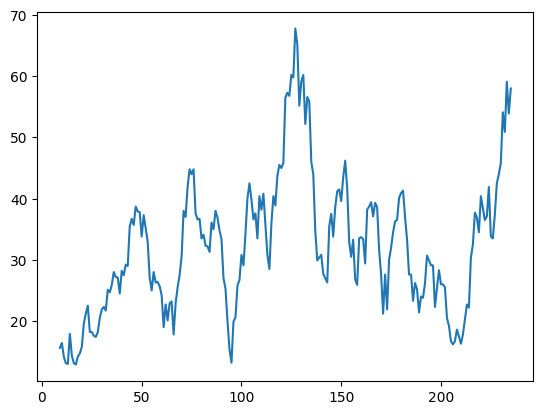

In [127]:
# kholi['Runs'].rolling(10).mean().plot()

In [125]:
#looks lile virat's run scoring machine follows a standard pattern

In [126]:
# kholi['Runs'].describe()

count    236.000000
mean      32.305085
std       27.499480
min        0.000000
25%        9.750000
50%       25.000000
75%       50.000000
max      113.000000
Name: Runs, dtype: float64

In [146]:
# model = auto_arima(kholi['Runs'])

In [147]:
# pred = model.predict(n_periods=1)

In [148]:
# pred

236    48.293289
dtype: float64

In [145]:
# kholi['Runs'].iloc[-1]

42

In [149]:
# model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  236
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -1101.127
Date:                Sat, 20 Apr 2024   AIC                           2220.253
Time:                        15:03:49   BIC                           2251.390
Sample:                             0   HQIC                          2232.806
                                - 236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3405      0.395      0.863      0.388      -0.433       1.114
ar.L1         -0.6316      0.110     -5.762      0.000      -0.846      -0.417
ar.L2         -0.6862      0.058    -11.768      0.000      -0.801      -0.572
ar.L3         -0.7355      0.109     -6.762      0.000      -0.949      -0.522
ma.L1         -0.2923      0.079     -3.715      0.000      -0.447      -0.138
ma.L2          0.1079      0.080      1.354      0.176      -0.048       0.264
ma.L3          0.2425      0.088      2.767      0.006       0.071       0.414
ma.L4         -0.8550      0.066    -13.023      0.000      -0.984      -0.726
sigma2       652.4854     66.956      9.745      0.000     521.255     783.716
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 9.33
Prob(Q):                              0.86   Prob(JB):                         0.01
Heteroskedasticity (H):               2.17   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
# mode_ball =  auto_arima(kholi['Balls'])

In [160]:
# list(mode_ball.predict(n_periods=1))

[31.216783466041537]

In [172]:
# bat[bat['Player']=='K Nitish Kumar Reddy']

,Player,Match,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot
1077,K Nitish Kumar Reddy,ipl2024_18,1,14,8,0,0,175.0,14,0,0,1,1,25.0
1078,K Nitish Kumar Reddy,ipl2024_23,1,64,37,1,64.0,173.0,64,1,0,4,5,29.7


In [178]:
# nk = auto_arima(bat[bat['Player']=='K Nitish Kumar Reddy']['Runs'].values)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [180]:
# nar = bat[bat['Player']=='SP Narine']

In [181]:
# adfuller(nar['Runs'])

(-1.622578050960345,
 0.47137798476606757,
 3,
 94,
 {'1%': -3.5019123847798657,
  '5%': -2.892815255482889,
  '10%': -2.583453861475781},
 753.8235668030286)

<Axes: >

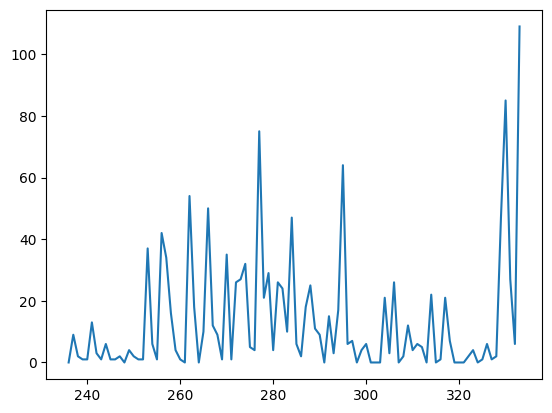

In [182]:
# nar['Runs'].plot()

<Axes: >

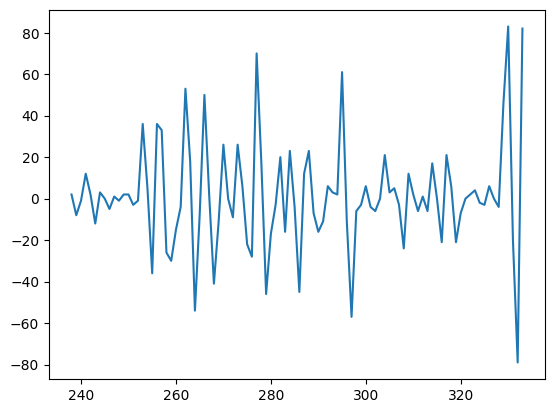

In [189]:
# nar['Runs'].diff(2).plot()

In [204]:
# mo_nar  = auto_arima(nar['Runs'].diff(2).iloc[2:])

In [205]:
# mo_nar.predict(n_periods=1)

c:\Users\navab\IPL_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\navab\IPL_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


96    50.457102
dtype: float64

In [193]:
# nar['Runs'].diff(2)

236     NaN
237     NaN
238     2.0
239    -8.0
240    -1.0
       ... 
329    46.0
330    83.0
331   -20.0
332   -79.0
333    82.0
Name: Runs, Length: 98, dtype: float64

In [206]:
# adfuller(nar['Balls'])

(-1.0778287045500985,
 0.7238320993481778,
 3,
 94,
 {'1%': -3.5019123847798657,
  '5%': -2.892815255482889,
  '10%': -2.583453861475781},
 618.1523148604963)

<Axes: >

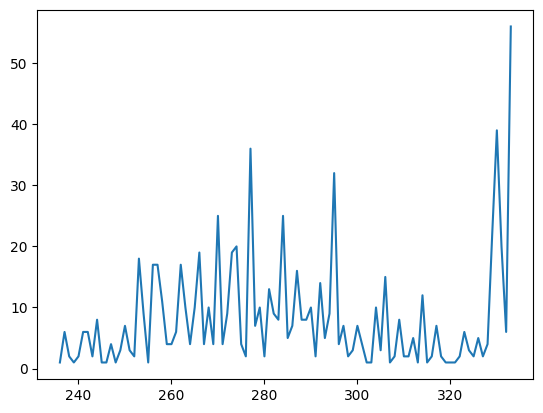

In [207]:
# nar['Balls'].plot()

In [229]:
# adfuller(nar['Balls'].diff().iloc[1:])[1]

0.7238320993481778

In [214]:
# nar_bal = auto_arima(np.abs(nar['Balls'].diff().iloc[1:]))

In [215]:
# nar_bal.predict(n_periods=1)

c:\Users\navab\IPL_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\navab\IPL_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


97    23.089313
dtype: float64

In [216]:
# riy = bat[bat['Player']=='R Parag']

In [230]:
# /adfuller(riy['Balls'])

(-4.116638288072383,
 0.0009089773511131918,
 1,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 300.19852282598225)

In [231]:
# riy_mo = auto_arima(np.abs(riy['Balls']))

In [232]:
# riy_mo.predict(n_periods=1)

c:\Users\navab\IPL_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\navab\IPL_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


51    13.352941
dtype: float64

In [251]:
# bat[bat['Player']=='Mustafizur Rahman']

,Player,Match,Innings,Runs,Balls,Outs,Avg,SR,HS,50,100,4s,6s,Dot
532,Mustafizur Rahman,ipl2018_23,1,1,3,1,1.0,33.3,1,0,0,0,0,66.7
533,Mustafizur Rahman,ipl2021_12,1,0,4,0,0,0.0,0,0,0,0,0,100.0
534,Mustafizur Rahman,ipl2021_51,1,8,7,0,0,114.3,8,0,0,0,1,57.1
535,Mustafizur Rahman,ipl2021_54,1,0,3,0,0,0.0,0,0,0,0,0,100.0
536,Mustafizur Rahman,ipl2022_10,1,3,5,0,0,60.0,3,0,0,0,0,40.0
537,Mustafizur Rahman,ipl2023_16,1,1,1,0,0,100.0,1,0,0,0,0,0.0


In [6]:
# raj = bat[bat['Player']=='RM Patidar']

In [7]:
# adfuller(raj['Runs'])

(-3.388133275876457,
 0.011370120957908474,
 0,
 16,
 {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625},
 101.56825076982639)

In [8]:
# model = auto_arima(raj['Runs'])

In [9]:
# model.predict(n_periods=1)

c:\Users\navab\IPL_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\navab\IPL_Prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


17    30.176471
dtype: float64